In [1]:
import sys,os
import numpy as np
import pandas as pd
import random
import math
from time import time
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/home/olya/TUM/DESMOND/DESMOND2/')
from run_unpast import run

from utils.method import read_bic_table, make_consensus_biclusters, zscore
from utils.method import cluster_samples, update_bicluster_data, write_bic_table
import matplotlib.pyplot as plt


%matplotlib inline

# Image-level analysis

In [2]:
anno = pd.read_csv("DKD2/clinical_data_dkd_with_patient_id.csv",index_col="unique_patient_id")
anno.head(3)

group  plate well  egfr_mdrd ckd_stage  age  \
unique_patient_id                                                  
1-2B               Non-CKD      1   2B      114.0         0   71   
1-2C               Non-CKD      1   2C      101.0         0   64   
1-1B                   CKD      1   1B       49.0        3a   82   

                   ischemic_time  sex_m0f1  height  weight  
unique_patient_id                                           
1-2B                        13.0       0.0   183.0    76.0  
1-2C                         0.0       1.0   146.0    58.0  
1-1B                        12.0       0.0   186.0   100.0

In [3]:
fname = "Abundancies-Per-Image-Background-Removed-Normalized-With-Additional-Data"
df = pd.read_excel("DKD2/"+fname+".xlsx",sheet_name="Sheet1",index_col=0)

intensities = df.iloc[:,:-7].T
anno_img = df.iloc[:,-7:]
anno_img.head(3)

plate well  position group unique_id  \
Plate_1-Image_1B-Position_12      1   1B        12   CKD   1-1B-12   
Plate_1-Image_1C-Position_14      1   1C        14   CKD   1-1C-14   
Plate_1-Image_1A-Position_11      1   1A        11   CKD   1-1A-11   

                             unique_patient_id  is_diabetic  
Plate_1-Image_1B-Position_12              1-1B            0  
Plate_1-Image_1C-Position_14              1-1C            0  
Plate_1-Image_1A-Position_11              1-1A            0

In [4]:
intensities.index = ["cluster_"+str(x) for x in intensities.index]

In [5]:
intensities.to_csv(fname+".intensities.data.tsv",sep = "\t")

In [6]:
out_dir = os.getcwd()
basename = "DKD2"
exprs_file = fname+".intensities.data.tsv"


In [7]:
from random import randint
random.seed(42)
seeds = [randint(0, 10000) for run in range(10)]
seeds

[1824, 409, 4506, 4012, 3657, 2286, 1679, 8935, 1424, 9674]

In [8]:
biclusters = []
for seed in seeds:
    df = run(exprs_file, basename, out_dir=out_dir,
                       save=True, load = False,
                       directions = ["BOTH"],
                       pval=0.05,
                       seed = seed,
                      verbose = False)
    df.index = ["seed="+str(seed)+"_"+str(x) for x in df.index.values ] 
    print("seed %s n biclusters: %s"%(seed,df.shape[0]))
    biclusters.append(df)



seed 1824 n biclusters: 1
seed 409 n biclusters: 1
seed 4506 n biclusters: 1
seed 4012 n biclusters: 1
seed 3657 n biclusters: 1
seed 2286 n biclusters: 1
seed 1679 n biclusters: 1
seed 8935 n biclusters: 2
seed 1424 n biclusters: 1
seed 9674 n biclusters: 1


In [9]:
pd.concat(biclusters)

SNR n_genes n_samples  \
seed=1824_0  2.633678       8       117   
seed=409_0   2.456861      10       114   
seed=4506_0  2.484622       9       118   
seed=4012_0  2.367084      11       118   
seed=3657_0   2.97349       6       113   
seed=2286_0   2.97349       6       113   
seed=1679_0  2.633678       8       117   
seed=8935_0  2.509453       7       117   
seed=8935_1  1.563744       2       167   
seed=1424_0  2.633678       8       117   
seed=9674_0  2.484622       9       118   

                                                         genes  \
seed=1824_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=409_0   {cluster_19, cluster_18, cluster_39, cluster_6...   
seed=4506_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=4012_0  {cluster_19, cluster_18, cluster_39, cluster_6...   
seed=3657_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=2286_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=1679_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=8935_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=8935_1                            {cluster_15, cluster_0}   
seed=1424_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   
seed=9674_0  {cluster_19, cluster_39, cluster_6, cluster_0,...   

                                                       samples direction  \
seed=1824_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=409_0   {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=4506_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=4012_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=3657_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=2286_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=1679_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=8935_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...        UP   
seed=8935_1  {Plate_2-Image_5B-Position_5, Plate_2-Image_3B...      DOWN   
seed=1424_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   
seed=9674_0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...      BOTH   

                                                      genes_up  \
seed=1824_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=409_0   {cluster_19, cluster_18, cluster_39, cluster_6...   
seed=4506_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=4012_0  {cluster_19, cluster_18, cluster_39, cluster_6...   
seed=3657_0  {cluster_19, cluster_39, cluster_6, cluster_9,...   
seed=2286_0  {cluster_19, cluster_39, cluster_6, cluster_9,...   
seed=1679_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=8935_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=8935_1                                                 {}   
seed=1424_0  {cluster_19, cluster_39, cluster_6, cluster_31...   
seed=9674_0  {cluster_19, cluster_39, cluster_6, cluster_31...   

                          genes_down  \
seed=1824_0              {cluster_0}   
seed=409_0               {cluster_0}   
seed=4506_0  {cluster_15, cluster_0}   
seed=4012_0  {cluster_15, cluster_0}   
seed=3657_0              {cluster_0}   
seed=2286_0              {cluster_0}   
seed=1679_0              {cluster_0}   
seed=8935_0                       {}   
seed=8935_1  {cluster_15, cluster_0}   
seed=1424_0              {cluster_0}   
seed=9674_0  {cluster_15, cluster_0}   

                                         gene_indexes  \
seed=1824_0             {0, 4, 6, 10, 14, 21, 22, 25}   
seed=409_0       {0, 1, 4, 6, 10, 13, 14, 21, 22, 25}   
seed=4506_0         {0, 4, 6, 10, 11, 14, 21, 22, 25}   
seed=4012_0  {0, 1, 4, 6, 10, 11, 13, 14, 21, 22, 25}   
seed=3657_0                     {0, 4, 6, 10, 14, 25}   
seed=2286_0                     {0, 4, 6, 10, 14, 25}   
seed=1679_0             {0, 4, 6, 10, 14, 21, 22, 25}   
seed=8935_0                {4, 6, 10, 14, 21, 22, 25}   
seed=893

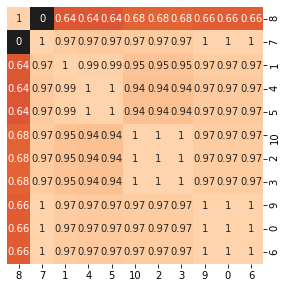

1 s for similarity matrix
	Running Louvain ...
	curve type: increasing


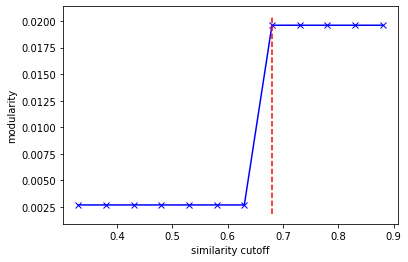

	Louvain runtime: modules detected in 0.32 s.
	modules: 1, not clustered features 1 
		similarity cutoff: 0.68 modularity: 0.020
1 s for making consensus biclusters from consensus gene sets


SNR n_genes n_samples  \
0  2.918348      11       112   

                                               genes  \
0  {cluster_19, cluster_18, cluster_0, cluster_39...   

                                             samples  \
0  {Plate_2-Image_5B-Position_5, Plate_2-Image_5A...   

                                            genes_up               genes_down  \
0  {cluster_19, cluster_18, cluster_39, cluster_6...  {cluster_15, cluster_0}   

                               gene_indexes  \
0  {0, 1, 4, 6, 10, 11, 13, 14, 21, 22, 25}   

                                      sample_indexes direction  \
0  {74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...      BOTH   

   detected_n_times  
0                10

In [10]:
results = make_consensus_biclusters(biclusters,intensities, frac_runs=1/3, min_n_genes=2,seed = seed,
                                   similarity="both", plot=True,figsize=(5,5),labels=True)
results = results.loc[results["detected_n_times"]>1,:]
results

In [11]:
known_groups = {}
known_groups["plate1"] = set(anno.loc[anno["plate"] ==1 ,:].index.values)
known_groups["diabetic_nephropaty"] = set(anno.loc[anno["group"] =="Diabetic-Nephropathy" ,:].index.values)
known_groups["CKD"] = set(anno.loc[anno["group"]=="CKD",:].index.values)
known_groups["Non-CKD"] = set(anno.loc[anno["group"]=="Non-CKD",:].index.values)
for k in known_groups.keys():
    known_groups[k] = set(anno_img.loc[anno_img["unique_patient_id"].isin(known_groups[k]),:].index.values)

In [12]:
from fisher import pvalue

In [13]:
anno_img.loc[['Plate_1-Image_3D-Position_1', 'Plate_2-Image_3C-Position_29'],:]

plate well  position                 group  \
Plate_1-Image_3D-Position_1       1   3D         1  Diabetic-Nephropathy   
Plate_2-Image_3C-Position_29      2   3C        29  Diabetic-Nephropathy   

                             unique_id unique_patient_id  is_diabetic  
Plate_1-Image_3D-Position_1     1-3D-1              1-3D            1  
Plate_2-Image_3C-Position_29   2-3C-29              2-3C            1

In [14]:
all_samples = set(intensities.columns.values)

In [15]:
stats = {}
for row in results.iterrows():
    i = row[0]
    samples = row[1]["samples"]
    stats[i] = {"bicluster": i}
    stats[i]["n_samples"] =  row[1]["n_samples"]
    stats[i]["clusters"] =  sorted([int(x.split("_")[1]) for x in row[1]["genes"]])
    for group in known_groups.keys():
        target_class = known_groups[group]
        o = len(samples.intersection(target_class))
        bic_only = len(samples.difference(target_class))
        group_only = len(target_class.difference(samples))
        bg = intensities.shape[1]- o - bic_only - group_only 
        p = pvalue(o, bic_only,group_only,bg)
        stats[i]["pval."+group] = p.right_tail
        if group =="diabetic_nephropaty":
            print(group, o, bic_only, group_only, bg,target_class.difference(samples))
            print()
        bic_samples = row[1]["samples"]
        bg_samples = all_samples.difference(bic_samples)

        img2pat = anno_img.loc[:,:]
        bic_pats = set(img2pat.loc[list(bic_samples),"unique_patient_id"].values)
        bg_pats = set(img2pat.loc[list(bg_samples),"unique_patient_id"].values)
        stats[i]["patients_in_both_groups"] =  list(bic_pats.intersection(bg_pats))
        
pd.set_option('display.float_format', '{:.2e}'.format)
stats = pd.DataFrame.from_dict(stats).T
cols = [ 'n_samples', 'clusters', 'pval.plate1', 'pval.diabetic_nephropaty', 'pval.CKD',
       'pval.Non-CKD','patients_in_both_groups']
stats.loc[:,cols]

diabetic_nephropaty 112 0 0 310 set()



n_samples                                  clusters pval.plate1  \
0       112  [0, 1, 6, 9, 14, 15, 18, 19, 28, 31, 39]    7.45e-03   

  pval.diabetic_nephropaty pval.CKD pval.Non-CKD patients_in_both_groups  
0                2.04e-105 1.00e+00     1.00e+00                      []

38


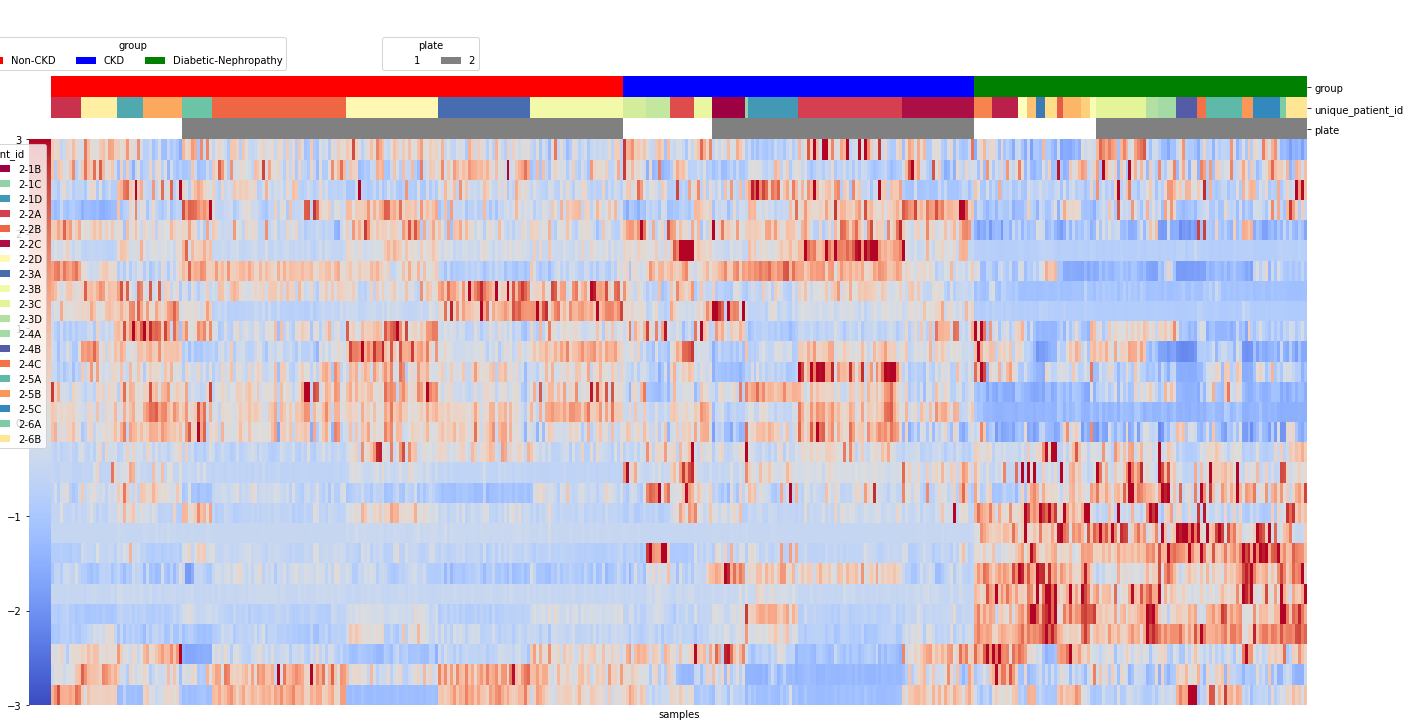

In [16]:
import colorsys

import seaborn as sns
from utils.figs import draw_heatmap
from collections import OrderedDict


color_dict = OrderedDict()

color_dict["group"] = OrderedDict({'Non-CKD':"red",
                                   'CKD':"blue",
                                   'Diabetic-Nephropathy':"green"})

color_dict["plate"] = OrderedDict({1:"white",
                                   2:"grey"})

N=len(set(anno_img["unique_patient_id"].values))
print(N)
cm = sns.color_palette("Spectral",N, as_cmap=True) # plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/N) for i in range(N)]
color_dict["unique_patient_id"] = dict(zip(sorted(set(anno_img["unique_patient_id"].values)),list(set(colors))))

a = anno_img.loc[:,["group","unique_patient_id","plate"]]
intensities_z = zscore(intensities)
cg,col_order = draw_heatmap(intensities_z,{},a,color_dict,figsize=(20,10),col_labels=False)
plt.show()

In [17]:
dir_ = "figures_and_tables/images_all/"
x = cg.data
row_ndx = cg.dendrogram_row.reordered_ind
row_order = x.iloc[row_ndx,:].index.values

a = anno_img.loc[:,["group","unique_patient_id","plate"]]
c_names = [c+"_color" for c in cg.col_color_labels]
colors_df = pd.DataFrame.from_records(cg.col_colors,
                                      index=c_names,
                                      columns=col_order).T
a = pd.concat([a.loc[col_order,:],colors_df],axis=1)
a.loc[col_order,:].to_csv(dir_+"DKD2_images.column_annotation.tsv", sep ="\t")
intensities_z.loc[row_order,col_order].to_csv(dir_+"DKD2_images.z_scores.tsv", sep ="\t")
cg.savefig(dir_+"DKD2_images.pdf")


cluster_0  is missed because it is the only down-regulated feature passed binarization

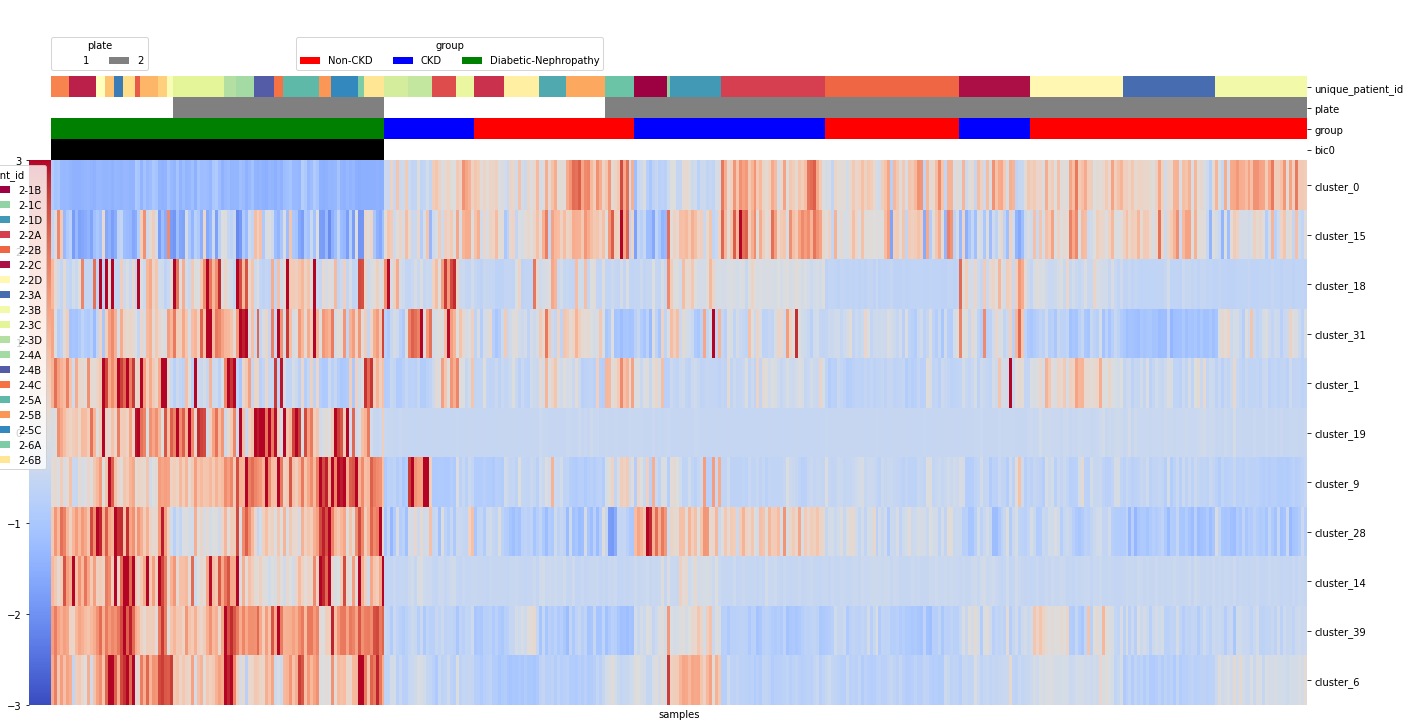

In [18]:
i = 0
dir_ = "figures_and_tables/images_bic"+str(i)+"/"
features =  results.loc[i,"genes"]
s0 = results.loc[i,"samples"]
e = intensities_z.loc[list(features),:]
sns_plot,col_order = draw_heatmap(e,{"bic"+str(i):s0},
                                  anno_img.loc[:,["unique_patient_id","plate","group"]],
                                  color_dict,figsize=(20,10),
                                 col_labels = False,row_labels = True)
plt.show()

x = sns_plot.data
row_order = x.iloc[sns_plot.dendrogram_row.reordered_ind,:].index.values

a = anno_img.loc[:,["group","unique_patient_id","plate"]]
a["bic"+str(i)] = 0
a.loc[sorted(s0),"bic"+str(i)] = 1
c_names = [c+"_color" for c in sns_plot.col_color_labels]
colors_df = pd.DataFrame.from_records(sns_plot.col_colors,
                                      index=c_names,
                                      columns=col_order).T

a = pd.concat([a.loc[col_order,:],colors_df],axis=1)
a.to_csv(dir_+"DKD2_images.bic"+str(i)+".column_annotation.tsv", sep ="\t")
intensities_z.loc[row_order,col_order].to_csv(dir_+"DKD2_images.bic"+str(i)+".z_scores.tsv", sep ="\t")
sns_plot.savefig(dir_+"DKD2_images.bic"+str(i)+".pdf")

In [19]:
s = results.loc[0,"samples"]
diabetic = set(anno_img.loc[anno_img.is_diabetic == 1,"unique_id"].index.values) #s.difference()
print(len(s.intersection(diabetic)),len(s.difference(diabetic)),len(diabetic.difference(s)))
(diabetic.difference(s))

112 0 0


set()

# Patient-level analysis

* patient-level cluster intensity = mean intensitsity over all images from this patient

In [20]:
anno_img.loc[:,["unique_patient_id"]]

pat_intensities = {}
for pat in set(anno_img["unique_patient_id"]):
    imgs = anno_img.loc[anno_img["unique_patient_id"]==pat,:].index.values
    pat_intensities[pat] = intensities.loc[:,imgs].mean(axis=1)

pat_intensities= pd.DataFrame.from_dict(pat_intensities)


In [21]:
from random import randint
random.seed(42)
seeds = [randint(0, 10000) for run in range(10)]
seeds

[1824, 409, 4506, 4012, 3657, 2286, 1679, 8935, 1424, 9674]

In [22]:
fname = "DKD2_patient-level.mean_intensities.tsv"
basename = "DKD2_patient-level"
pat_intensities.to_csv(fname,sep = "\t")
biclusters2 = []
for seed in seeds:
    df = run(fname, basename, out_dir=out_dir,
                       save=True, load = False,
                       seed = seed,
                       directions = ["BOTH"],
                       pval = 0.05,
                      verbose = False)
    print("seed %s n biclusters: %s"%(seed,df.shape[0]))
    df.index = ["seed="+str(seed)+"_"+str(x) for x in df.index.values ]
    biclusters2.append(df)

seed 1824 n biclusters: 3
seed 409 n biclusters: 1
seed 4506 n biclusters: 4
seed 4012 n biclusters: 0
seed 3657 n biclusters: 0
seed 2286 n biclusters: 4
seed 1679 n biclusters: 4
seed 8935 n biclusters: 1
seed 1424 n biclusters: 1
seed 9674 n biclusters: 1


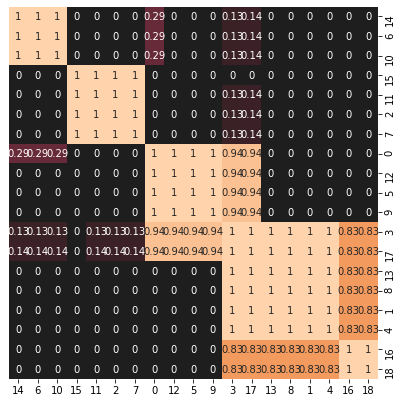

1 s for similarity matrix
	Running Louvain ...
	curve type: increasing


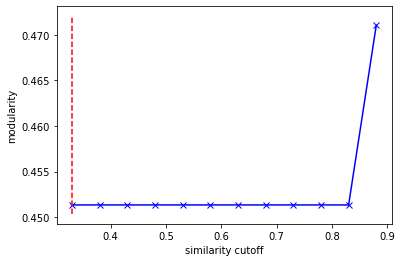

	Louvain runtime: modules detected in 0.33 s.
	modules: 4, not clustered features 0 
		similarity cutoff: 0.33 modularity: 0.451
2 s for making consensus biclusters from consensus gene sets


SNR n_genes n_samples  \
0 3.37e+00      16        18   
1 2.45e+00       6        19   
2 1.96e+00       2        13   
3 1.88e+00       2        14   

                                               genes  \
0  {cluster_37, cluster_20, cluster_18, cluster_7...   
1  {cluster_19, cluster_37, cluster_7, cluster_18...   
2                             {cluster_6, cluster_1}   
3                           {cluster_15, cluster_28}   

                                             samples  \
0  {1-1B, 1-1D, 2-2A, 2-3B, 2-3A, 2-1B, 1-1C, 2-2...   
1  {1-1B, 2-1B, 1-1C, 2-2D, 1-1A, 2-1D, 1-2C, 1-3...   
2  {1-3D, 1-5D, 1-6A, 2-6A, 1-4B, 2-3D, 2-1C, 1-6...   
3  {2-4A, 1-3D, 1-4A, 1-6A, 2-6A, 1-4B, 2-5C, 2-1...   

                                            genes_up  \
0  {cluster_37, cluster_7, cluster_20, cluster_21...   
1                            {cluster_37, cluster_7}   
2                             {cluster_6, cluster_1}   
3                                       {cluster_28}   

                                          genes_down  \
0  {cluster_18, cluster_28, cluster_39, cluster_6...   
1    {cluster_18, cluster_9, cluster_19, cluster_39}   
2                                                 {}   
3                                       {cluster_15}   

                                        gene_indexes  \
0  {0, 1, 4, 5, 6, 7, 11, 12, 13, 15, 16, 21, 24,...   
1                             {5, 6, 13, 14, 24, 25}   
2                                             {1, 4}   
3                                           {11, 21}   

                                      sample_indexes direction  \
0  {0, 2, 3, 5, 6, 7, 8, 9, 37, 11, 15, 16, 18, 2...      BOTH   
1  {0, 2, 3, 5, 6, 7, 8, 9, 11, 15, 16, 18, 20, 2...      BOTH   
2  {1, 33, 4, 36, 12, 17, 19, 22, 24, 25, 27, 28,...        UP   
3  {32, 1, 2, 33, 34, 36, 10, 14, 17, 20, 25, 27,...      BOTH   

   detected_n_times  
0                 8  
1                 4  
2                 4  
3                 3

In [23]:
results_pat2 = make_consensus_biclusters(biclusters2, 
                                    pat_intensities,
                                         frac_runs=1/2, min_n_genes=2,seed = seed,
                                         similarity="both",plot=True,figsize=(7,7),labels=True)
results_pat2 

In [24]:
print("patients in annotation",anno.shape[0])
print("patients in data",pat_intensities.shape[0])
shared = set(anno.index).intersection(pat_intensities.columns)
print("patients in intersection",len(shared))

patients in annotation 44
patients in data 28
patients in intersection 38


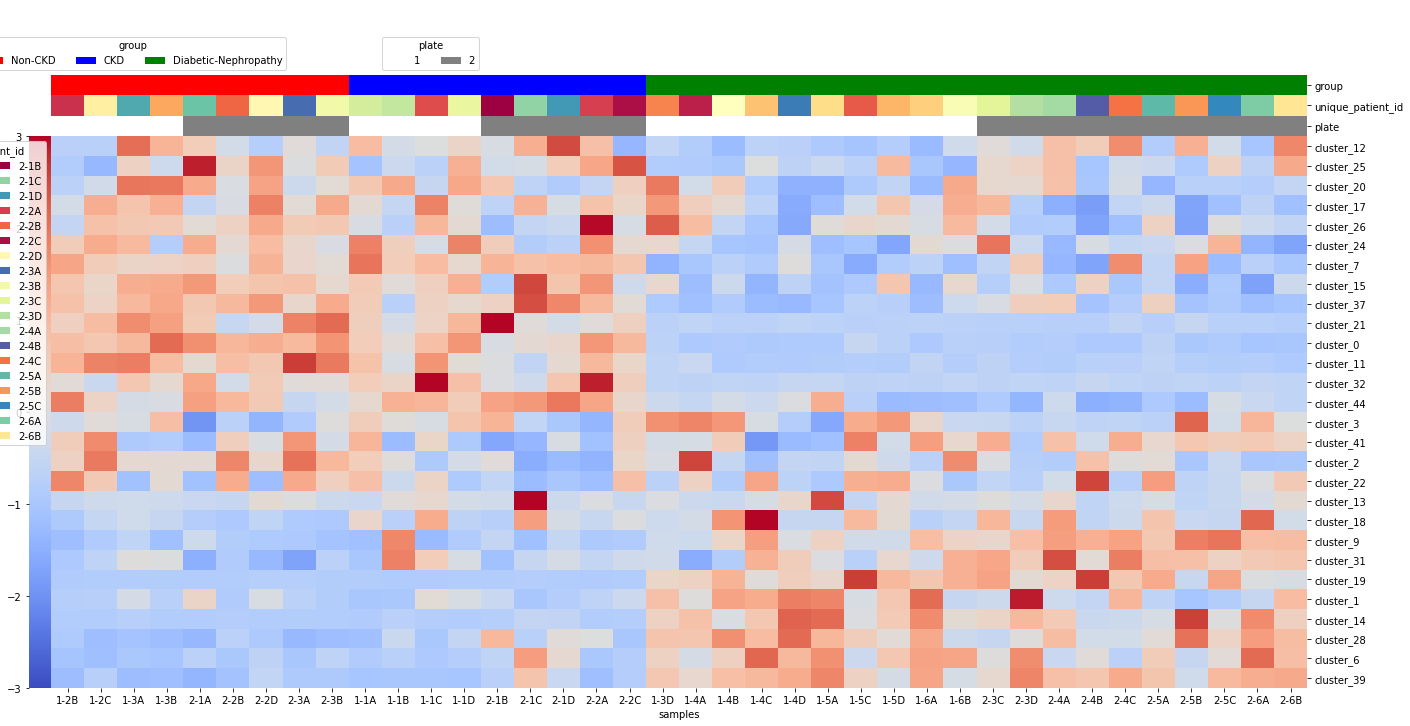

In [31]:
pat_intensities_z = zscore(pat_intensities)
anno["unique_patient_id"] = anno.index
N=len(shared)
cm = sns.color_palette("Spectral",N, as_cmap=True) # plt.get_cmap('gist_rainbow') 
colors=[cm(1.*i/N) for i in range(N)]
color_dict["unique_patient_id"] = dict(zip(sorted(set(anno_img["unique_patient_id"].values)),list(set(colors))))

a = anno.loc[pat_intensities_z.columns,["group","unique_patient_id","plate"]]
cg,col_order =draw_heatmap(pat_intensities_z,{},a,color_dict,figsize=(20,10),col_labels=True,row_labels=True)
plt.show()

In [26]:
dir_ = "figures_and_tables/patients_all/"
x = cg.data
row_ndx = cg.dendrogram_row.reordered_ind
row_order = x.iloc[row_ndx,:].index.values

a = anno.loc[:,["group","unique_patient_id","plate"]]
c_names = [c+"_color" for c in cg.col_color_labels]
colors_df = pd.DataFrame.from_records(cg.col_colors,
                                      index=c_names,
                                      columns=col_order).T
a = pd.concat([a.loc[col_order,:],colors_df],axis=1)
a.loc[col_order,:].to_csv(dir_+"DKD2_patients.column_annotation.tsv", sep ="\t")
pat_intensities_z.loc[row_order,col_order].to_csv(dir_+"DKD2_patients.z_scores.tsv", sep ="\t")
cg.savefig(dir_+"DKD2_patients.pdf")


bicluster 0


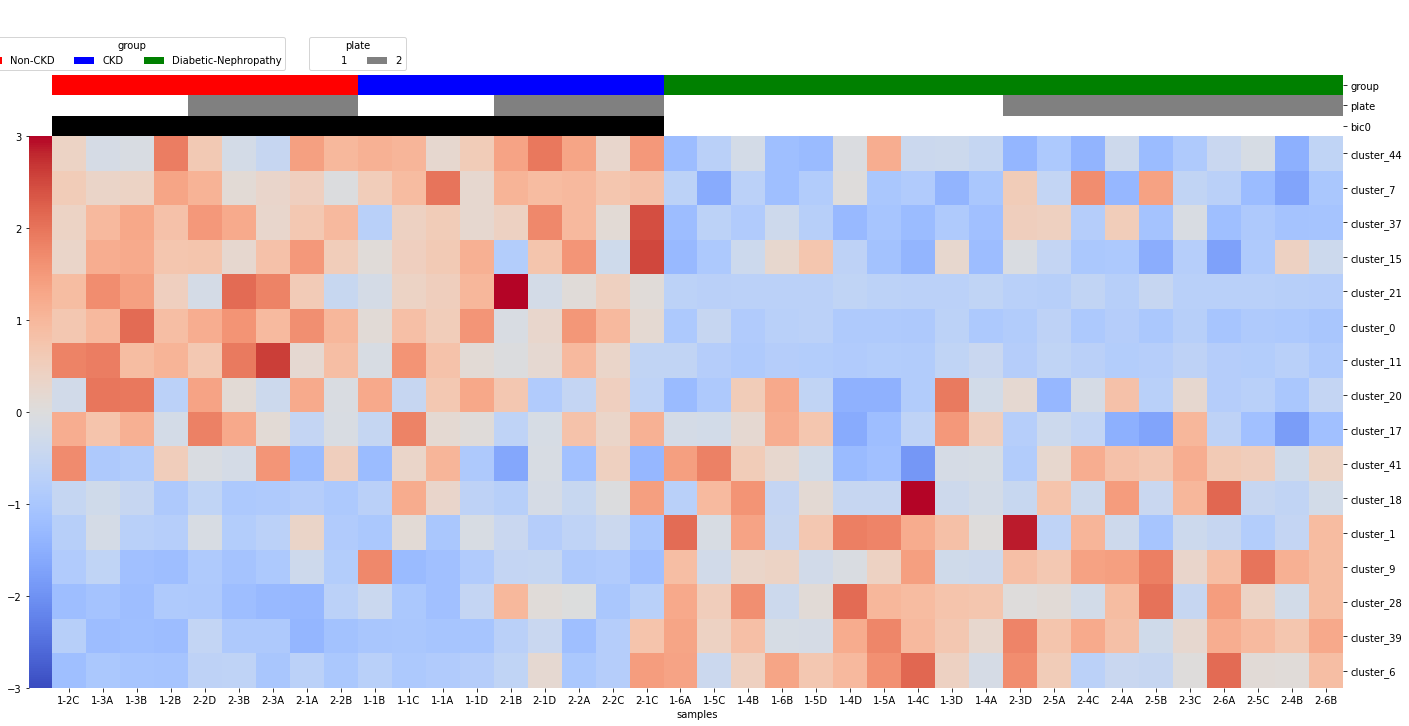

bicluster 1


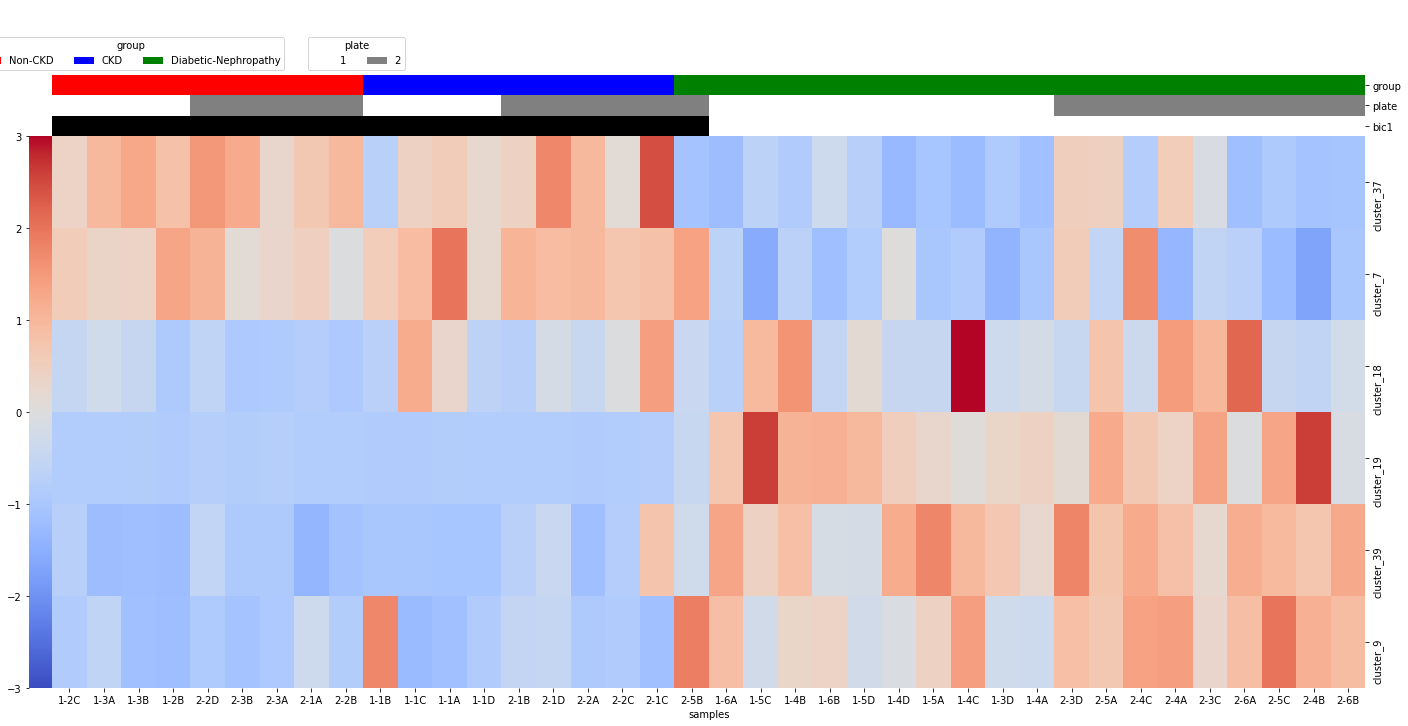

bicluster 2


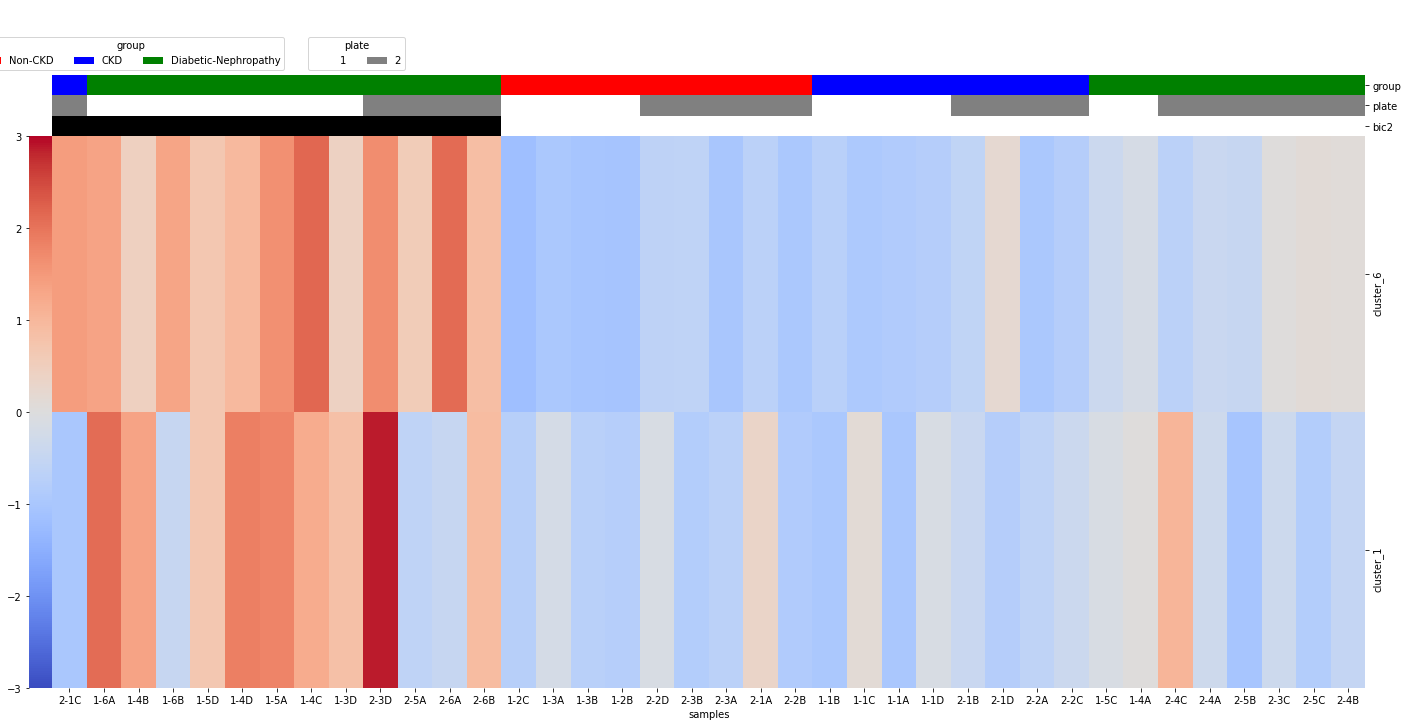

bicluster 3


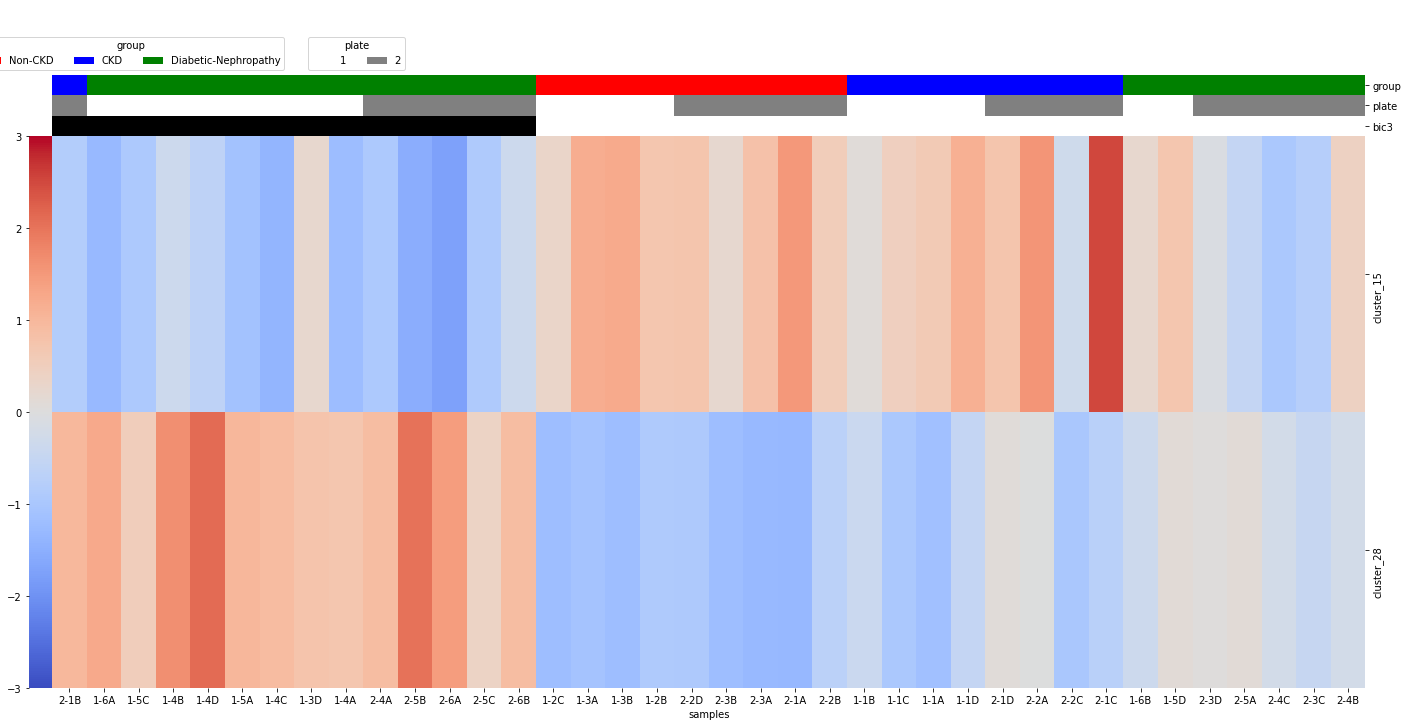

In [29]:
for i in range(results_pat2.shape[0]):
    out_dir = "figures_and_tables/patients_bic"+str(i)+"/"
    try:
        os.makedirs(out_dir)
    except:
        pass
    print("bicluster", i )
    features =  results_pat2.loc[i,"genes"]
    s0 = results_pat2.loc[i,"samples"]

    e = pat_intensities_z.loc[list(features),:]

    a = anno.loc[e.columns,["group","plate"]]
    a["bic"+str(i)] = 0
    a.loc[sorted(s0),"bic"+str(i)] = 1

    sns_plot,col_order = draw_heatmap(e,{"bic"+str(i):s0},a.loc[:,["group","plate"]],color_dict,figsize=(20,10),row_labels=True)
    plt.show()

    x = sns_plot.data
    row_order = x.iloc[sns_plot.dendrogram_row.reordered_ind,:].index.values


    c_names = [c+"_color" for c in sns_plot.col_color_labels]
    colors_df = pd.DataFrame.from_records(sns_plot.col_colors,
                                          index=c_names,
                                          columns=col_order).T

    a = pd.concat([a.loc[col_order,:],colors_df],axis=1)
    a.to_csv(out_dir+"DKD2_patients.bic"+str(i)+".column_annotation.tsv", sep ="\t")
    pat_intensities_z.loc[row_order,col_order].to_csv(out_dir+"DKD2_patients.bic"+str(i)+".z_scores.tsv", sep ="\t")
    sns_plot.savefig(out_dir+"DKD2_patients.bic"+str(i)+".pdf")